# ***Deciphering Protein Dynamics from Experimentally Resolved Structures***

This notebook provides executable Python code snippets designed to complement the practical exercises discussed in the book chapter.
Each code cell is organized to reflect the flow of the exercises, aligned with the corresponding section numbers and titles.

NOTE: Begin by running the first cell to install the required Python packages.

If you wish to work offline, the complete notebook can be downloaded from the GitHub repository or directly from this Colab page.

# Required installations

In [ ]:
!pip install biopython matplotlib seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.7 MB/s eta 0:00:00


# **Section 2.0 Exploring Protein Dynamics in Structures resolved with X-ray Crystallography**

## Section 2.1: Visualizing Local Conformational Changes

### 2.1.1 Quantifying structural deviations

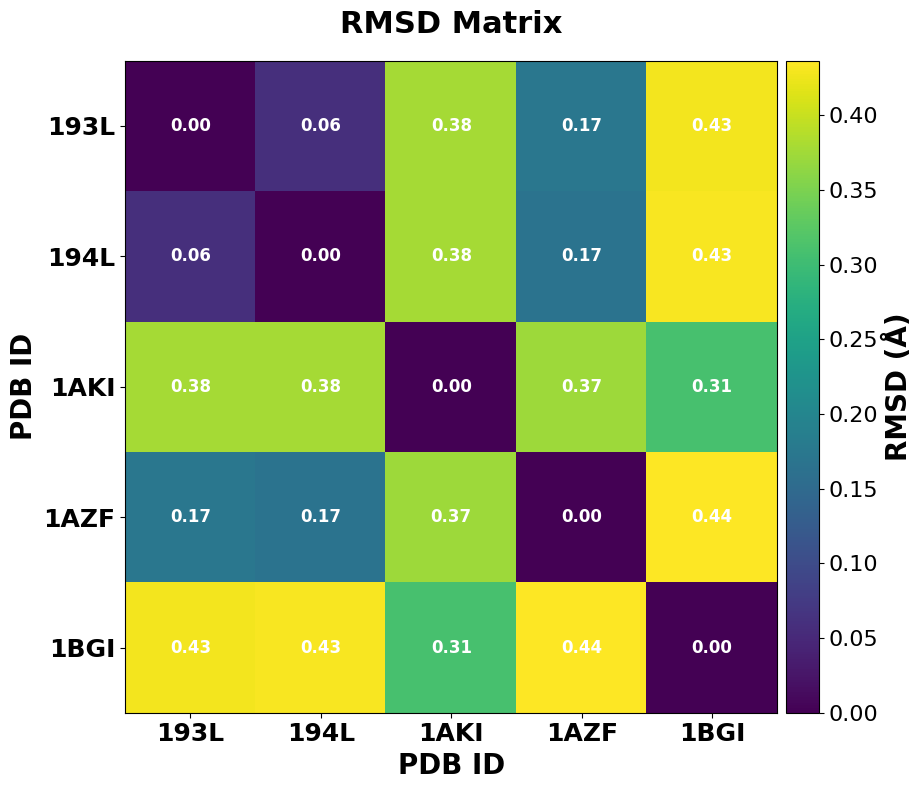

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from Bio.PDB import PDBList, PDBParser, Superimposer, is_aa

# List of PDB IDs
pdb_ids = ["193L", "194L", "1AKI", "1AZF", "1BGI"]

# Fetch PDB files
pdb_dir = "./pdb_files"
pdbl = PDBList()
pdb_files = [pdbl.retrieve_pdb_file(pdb_id, pdir=pdb_dir, file_format="pdb") for pdb_id in pdb_ids]

# Function to extract C-alpha atoms
def get_calpha_atoms(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("structure", pdb_file)
    ca_atoms = []
    for model in structure:
        for chain in model:
            for residue in chain:
                if is_aa(residue, standard=True) and "CA" in residue:
                    ca_atoms.append(residue["CA"])
    return ca_atoms

# Extract C-alpha atoms for all structures
calpha_structures = [get_calpha_atoms(pdb_file) for pdb_file in pdb_files]

# Calculate RMSD matrix
n_structures = len(calpha_structures)
rmsd_matrix = np.zeros((n_structures, n_structures))

for i in range(n_structures):
    for j in range(n_structures):
        # Perform superposition
        sup = Superimposer()
        ref_atoms = calpha_structures[i]
        alt_atoms = calpha_structures[j]
        min_len = min(len(ref_atoms), len(alt_atoms))
        ref_atoms = ref_atoms[:min_len]
        alt_atoms = alt_atoms[:min_len]
        sup.set_atoms(ref_atoms, alt_atoms)
        rmsd_matrix[i, j] = sup.rms
        rmsd_matrix[j, i] = sup.rms

# Plot the RMSD matrix with publication-quality settings
plt.figure(figsize=(10, 8))
cax = plt.imshow(rmsd_matrix, cmap="viridis", interpolation="nearest")

# Add colorbar with enhanced label
cbar = plt.colorbar(cax, pad=0.01)
cbar.ax.set_ylabel("RMSD (Å)", fontsize=20, fontweight='bold')
cbar.ax.tick_params(labelsize=16)

# Adjusting axis labels
plt.xticks(range(len(pdb_ids)), pdb_ids, fontsize=18, fontweight='bold')
plt.yticks(range(len(pdb_ids)), pdb_ids, fontsize=18, fontweight='bold')

# Title and axis labels with larger font
plt.title("RMSD Matrix", fontsize=22, pad=20, fontweight='bold')
plt.xlabel("PDB ID", fontsize=20, fontweight='bold')
plt.ylabel("PDB ID", fontsize=20, fontweight='bold')

# Annotate RMSD values in each cell with improved readability
for i in range(n_structures):
    for j in range(n_structures):
        plt.text(j, i, f"{rmsd_matrix[i, j]:.2f}", ha="center", va="center", color="white", fontsize=12, fontweight='bold')

# Tight layout to avoid clipping
plt.tight_layout()

# Save the plot as a high-quality image
plt.savefig("rmsd_matrix.png", dpi=1500, bbox_inches="tight")

plt.show()


## 2.1.2 Examining Local Flexibility through B-Factor Profiles

Structure exists: 'pdb_files/pdb193l.ent' 
Structure exists: 'pdb_files/pdb194l.ent' 
Structure exists: 'pdb_files/pdb1aki.ent' 
Structure exists: 'pdb_files/pdb1azf.ent' 
Structure exists: 'pdb_files/pdb1bgi.ent' 


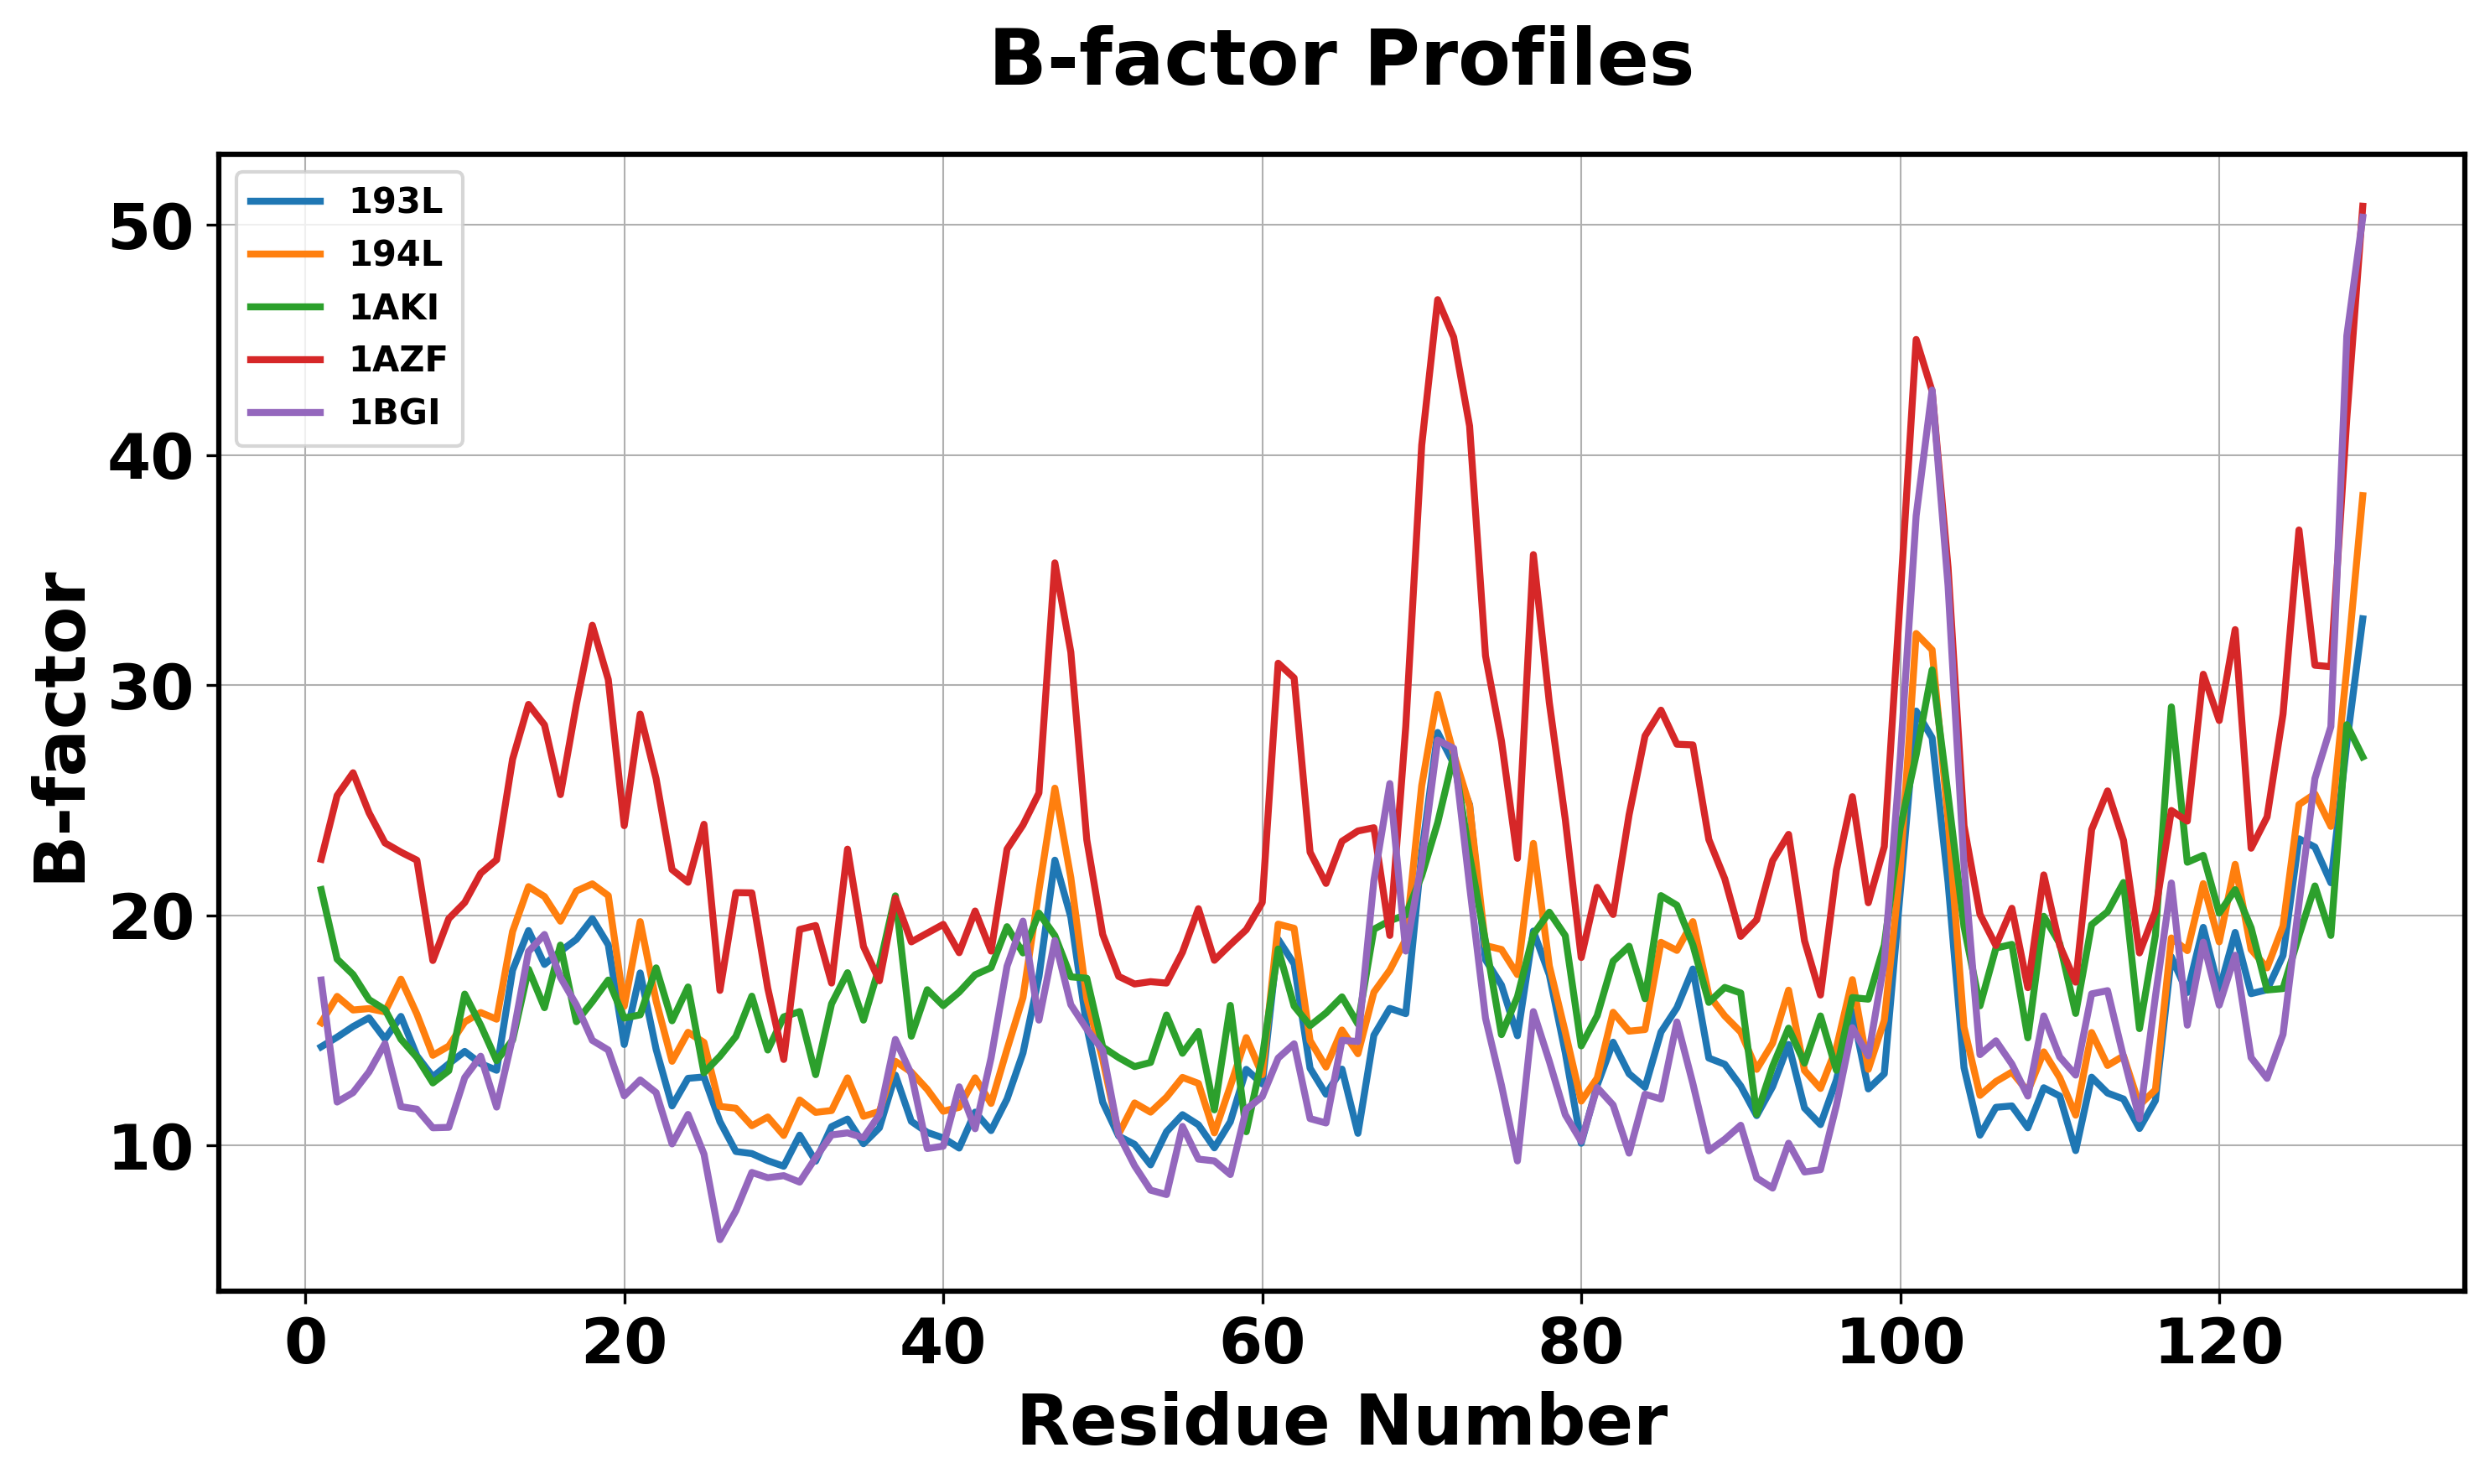

In [ ]:
from Bio.PDB import PDBList, PDBParser
import matplotlib.pyplot as plt
import os

# List of PDB IDs
pdb_ids = ['193L', '194L', '1AKI', '1AZF', '1BGI']

# Directory to store downloaded files
pdb_dir = 'pdb_files'
os.makedirs(pdb_dir, exist_ok=True)

# Download and parse PDB files
pdbl = PDBList()
parser = PDBParser(QUIET=True)

plt.figure(figsize=(10, 6), dpi=300)

for pdb_id in pdb_ids:
    # Download file
    pdbl.retrieve_pdb_file(pdb_id, pdir=pdb_dir, file_format='pdb')

    # Parse file
    structure = parser.get_structure(pdb_id, os.path.join(pdb_dir, f'pdb{pdb_id.lower()}.ent'))

    # Collect B-factors for C-alpha atoms
    b_factors = []
    res_ids = []
    for model in structure:
        for chain in model:
            for residue in chain:
                if 'CA' in residue:
                    ca_atom = residue['CA']
                    b_factors.append(ca_atom.get_bfactor())
                    res_ids.append(residue.get_id()[1])
        break  # Use only the first model

    # Plot
    plt.plot(res_ids, b_factors, label=pdb_id, linewidth=2.0)

# Customize plot for publication quality
plt.xlabel("Residue Number", fontsize=20, fontweight='bold')
plt.ylabel("B-factor", fontsize=20, fontweight='bold')
plt.title("B-factor Profiles", fontsize=22, pad=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.legend(fontsize=15, prop={'weight': 'bold'})
plt.grid(True, linewidth=0.5)

# Make axes lines thicker
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()

# Save the plot as a high-quality image
plt.savefig("bfactor_profile.png", dpi=1500, bbox_inches="tight")

plt.show()


## Section 2.1: Visualizing the proteins crystallized under different pH conditions

### 2.2.5: Backbone dihedral angle changes and the Ramachandran plot

Phi and Psi angles for Arginine 50:
1REX: ϕ = 66.60°, ψ = 22.75°
1I20: ϕ = 71.07°, ψ = 14.01°
1BB4: ϕ = 58.33°, ψ = 24.65°


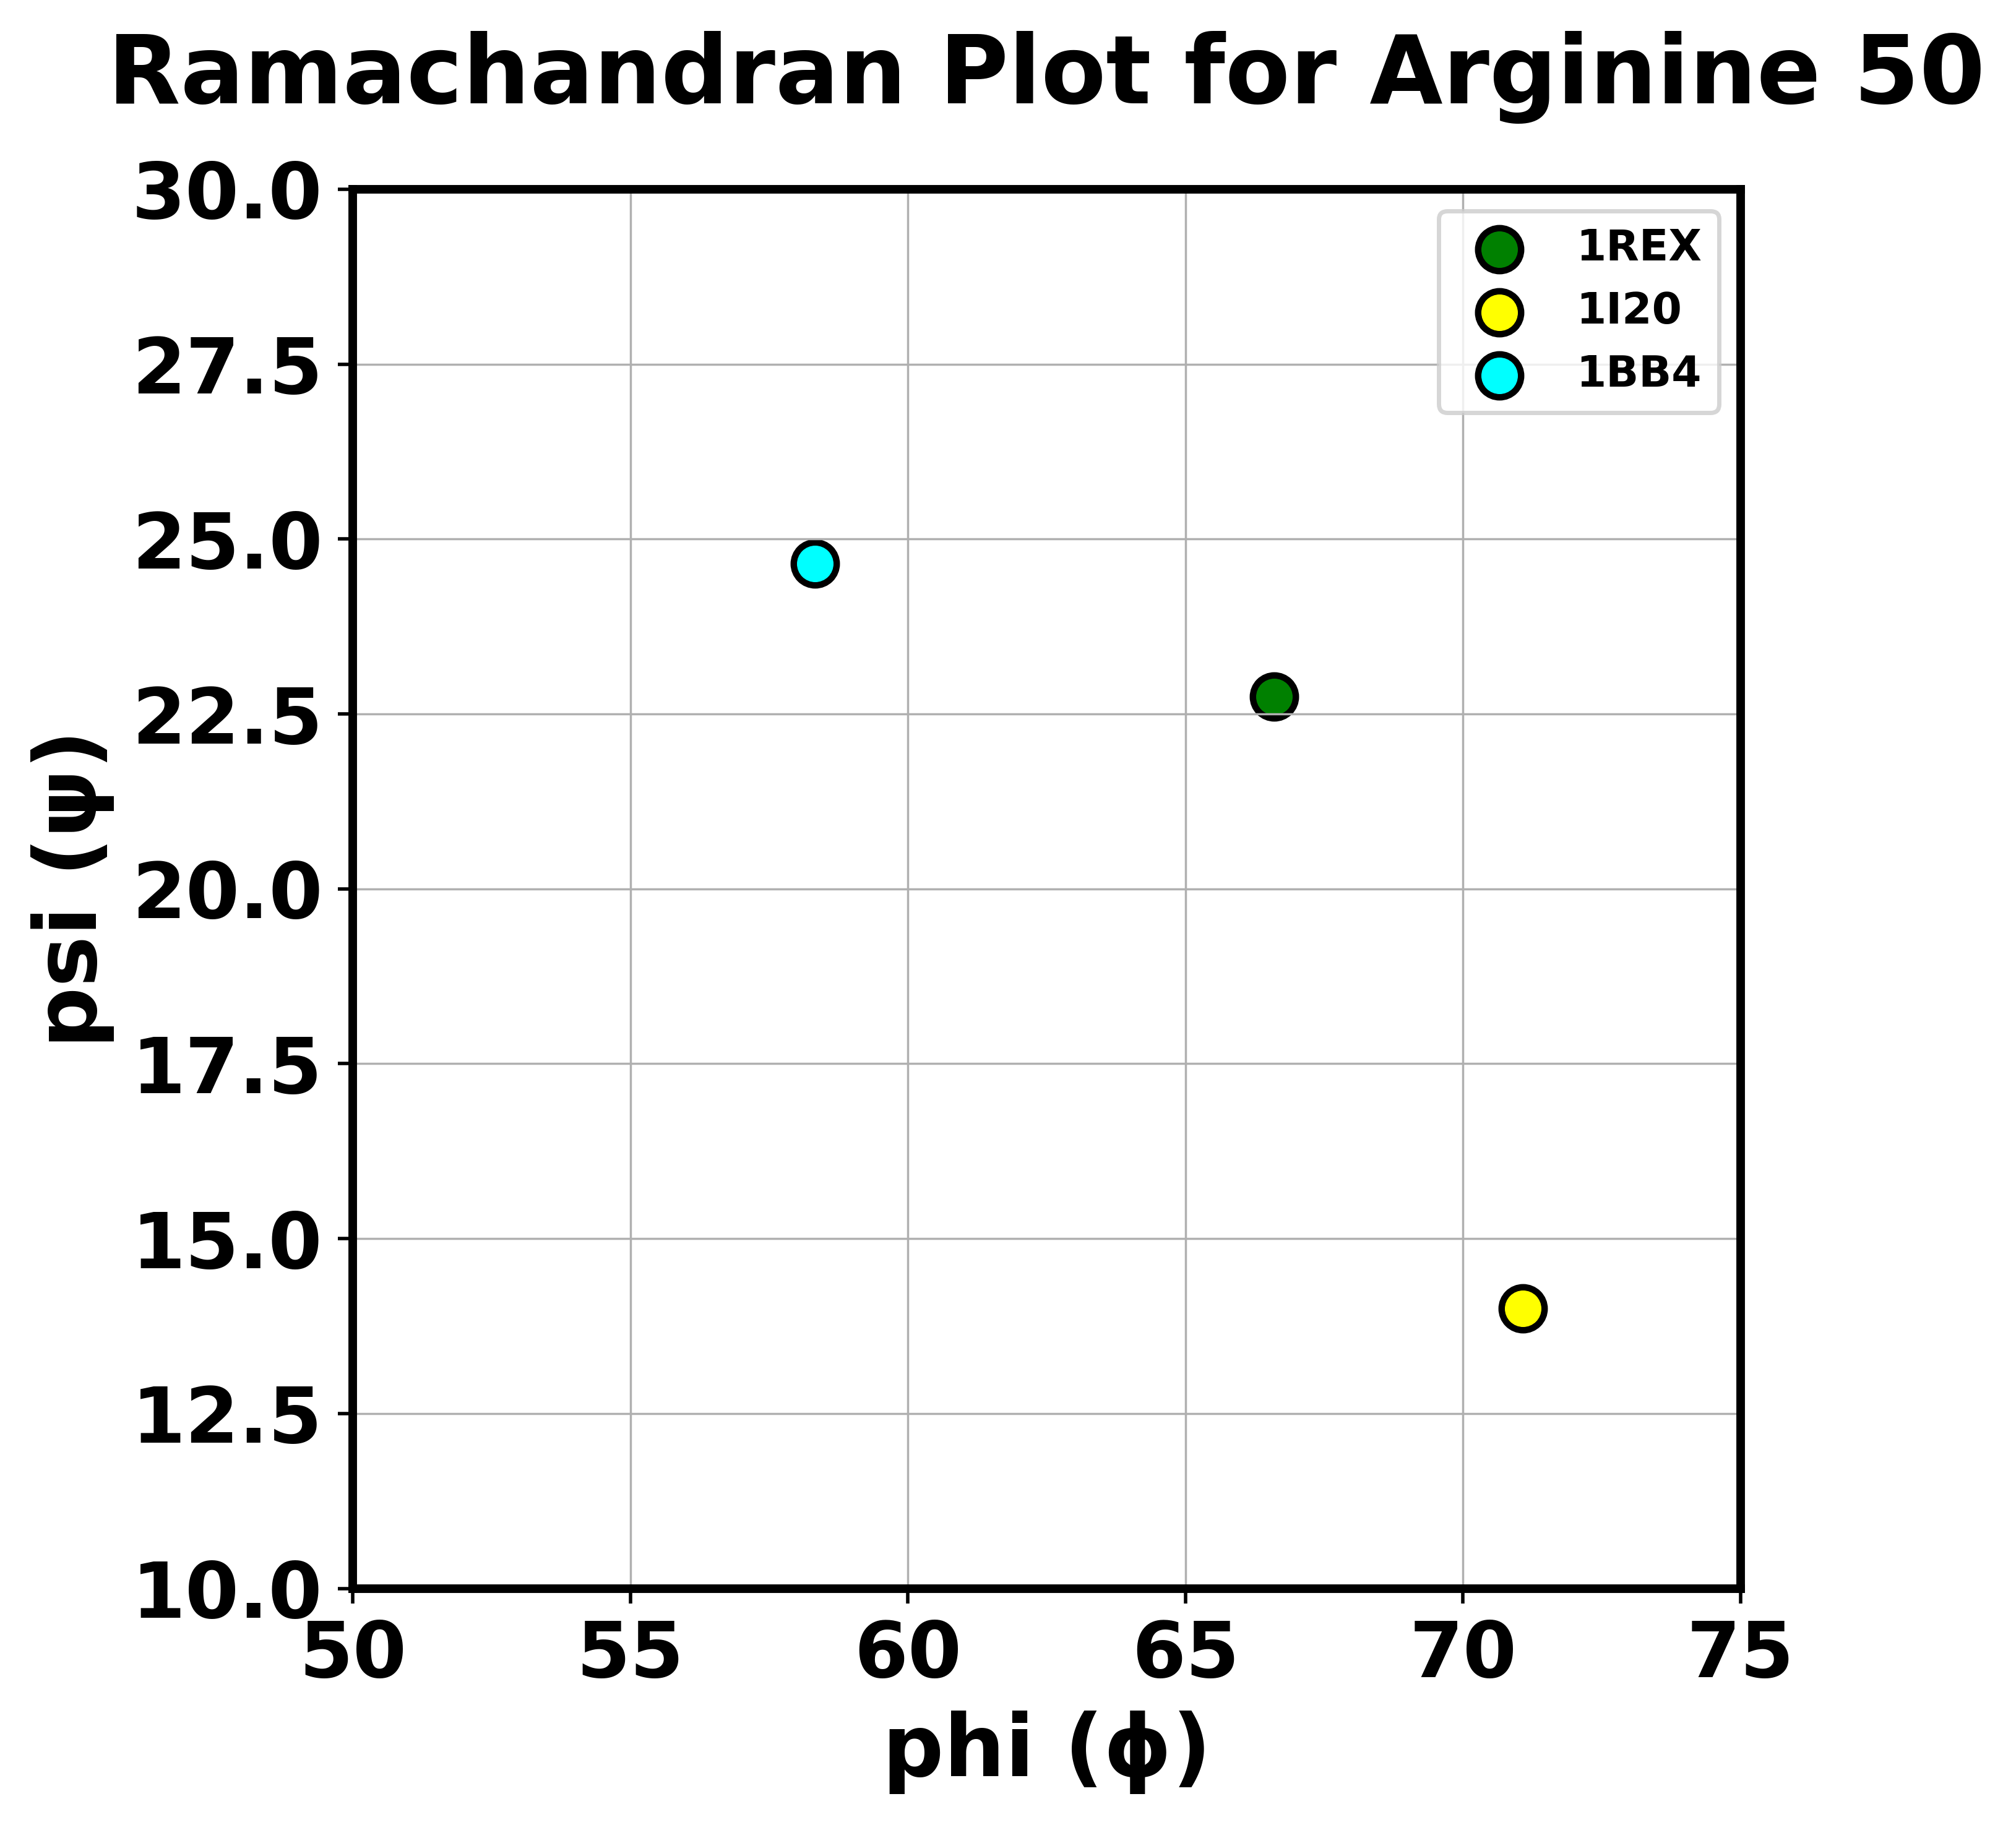

In [ ]:
from Bio.PDB import PDBParser, PPBuilder
import matplotlib.pyplot as plt
import numpy as np
import requests
import os

# PDB IDs and corresponding colors for pH
pdb_info = {
    '1REX': 'green',   # pH 4.5
    '1I20': 'yellow',  # pH 6.0
    '1BB4': 'cyan'     # pH 8.5
}

parser = PDBParser(QUIET=True)
ppb = PPBuilder()
angle_data = {}

# Download, parse, and extract phi/psi angles at residue 50
for pdb_id, color in pdb_info.items():
    url = f'https://files.rcsb.org/download/{pdb_id}.pdb'
    filename = f'{pdb_id}.pdb'
    if not os.path.exists(filename):
        with open(filename, 'w') as f:
            f.write(requests.get(url).text)

    structure = parser.get_structure(pdb_id, filename)
    angles = []

    for model in structure:
        for chain in model:
            if chain.id != 'A':  # Optional: only Chain A
                continue
            for pp in ppb.build_peptides(chain):
                phi_psi = pp.get_phi_psi_list()
                for i, (phi, psi) in enumerate(phi_psi):
                    res_id = pp[i].get_id()[1]
                    if res_id == 50 and phi and psi:
                        phi_deg = np.degrees(phi)
                        psi_deg = np.degrees(psi)
                        angles.append((phi_deg, psi_deg))
                        break
                if angles:
                    break
            if angles:
                break
        break

    angle_data[pdb_id] = {'angles': angles, 'color': color}

# Print the results
print("Phi and Psi angles for Arginine 50:")
for pdb_id, data in angle_data.items():
    for phi, psi in data['angles']:
        print(f"{pdb_id}: ϕ = {phi:.2f}°, ψ = {psi:.2f}°")

# Ramachandran plot
plt.figure(figsize=(6, 6), dpi=500)
for pdb_id, data in angle_data.items():
    if data['angles']:
        phis, psis = zip(*data['angles'])
        plt.scatter(phis, psis, s=100, color=data['color'], label=pdb_id, edgecolors='black', linewidths=1.5)

# Zoom into region of interest
plt.xlim(50, 75)
plt.ylim(10, 30)

plt.xlabel("phi (ϕ)", fontsize=20, fontweight='bold')
plt.ylabel("psi (ψ)", fontsize=20, fontweight='bold')
plt.title("Ramachandran Plot for Arginine 50", fontsize=22, pad=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.axhline(0, color='black', linewidth=1.5)
plt.axvline(0, color='black', linewidth=1.5)
plt.grid(True, linewidth=0.5)

# Bold axis lines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)

plt.legend(fontsize=15, prop={'weight': 'bold'})
plt.tight_layout()

# Save before showing to ensure it captures correctly
plt.savefig("ramachandran_plot.png", dpi=1500, bbox_inches="tight")
plt.show()


# **Section 3.0 Exploring Dynamics of the Proteins from NMR Structures**

## Section 3.1: Visualizing Protein Conformational Flexibility

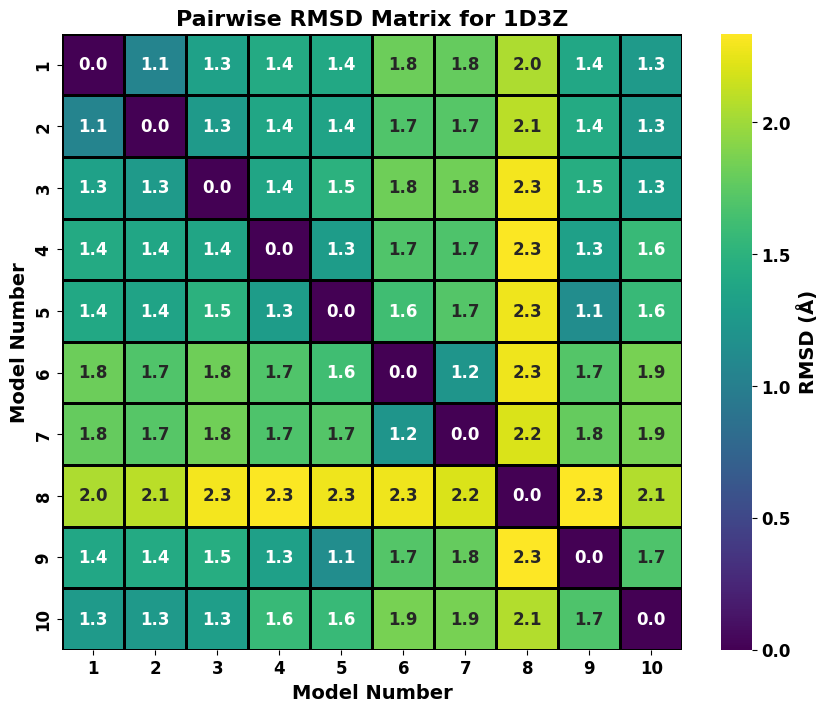

In [ ]:
from Bio import PDB
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to download PDB file and calculate pairwise RMSD
def download_and_calculate_rmsd(pdb_id):
    pdbl = PDB.PDBList()

    # Download the PDB file
    pdb_file = pdbl.retrieve_pdb_file(pdb_id, pdir='.', file_format='pdb')

    # Load the structure
    pdb_parser = PDB.PDBParser(QUIET=True)
    structure = pdb_parser.get_structure(pdb_id, pdb_file)

    # Calculate pairwise RMSD
    model_list = [model for model in structure]
    num_models = len(model_list)
    rmsd_matrix = np.zeros((num_models, num_models))

    for i in range(num_models):
        for j in range(i + 1, num_models):
            # Align and calculate RMSD
            super_imposer = PDB.Superimposer()
            super_imposer.set_atoms(list(model_list[i].get_atoms()), list(model_list[j].get_atoms()))
            rmsd_matrix[i, j] = super_imposer.rms
            rmsd_matrix[j, i] = super_imposer.rms

    return rmsd_matrix

# Define the PDB ID
pdb_id = '1D3Z'  # Replace with your desired PDB ID

# Calculate RMSD matrix
rmsd_matrix = download_and_calculate_rmsd(pdb_id)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    rmsd_matrix,
    cmap='viridis',
    cbar_kws={'label': 'RMSD (Å)'},
    annot=True,
    fmt=".1f",
    annot_kws={"size": 12, "weight": "bold"},
    linecolor='black', linewidths=1  # black grid lines
)

num_models = rmsd_matrix.shape[0]
ax.set_xticks(np.arange(num_models) + 0.5)
ax.set_yticks(np.arange(num_models) + 0.5)
ax.set_xticklabels(np.arange(1, num_models + 1), fontsize=12, fontweight='bold')
ax.set_yticklabels(np.arange(1, num_models + 1), fontsize=12, fontweight='bold')

# Set title and labels with bold and bigger font
plt.title(f'Pairwise RMSD Matrix for {pdb_id}', fontsize=16, fontweight='bold')
plt.xlabel('Model Number', fontsize=14, fontweight='bold')
plt.ylabel('Model Number', fontsize=14, fontweight='bold')

# Make colorbar label bold and big
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('RMSD (Å)', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=12)
for l in cbar.ax.get_yticklabels():
    l.set_fontweight("bold")

for spine in ax.spines.values():
    spine.set_linewidth(5.0)
    spine.set_color("black")

# Save the plot
plt.savefig(f"RMSD_Matrix_{pdb_id}.png", dpi=1500, bbox_inches="tight")

plt.show()


##Section 3.2: Finding a representative structure from the ensemble of protein structures

Finding Average(Mean) Structure from the ensemble of structures


In [ ]:
import numpy as np
from Bio.PDB import PDBParser
import requests
from google.colab import files

def download_pdb(pdb_id):
    #Download PDB file from the RCSB PDB database
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    if response.status_code == 200:
        with open(f"{pdb_id}.pdb", "wb") as f:
            f.write(response.content)
        print(f"PDB file {pdb_id}.pdb downloaded successfully!")
    else:
        raise FileNotFoundError(f"PDB file {pdb_id}.pdb not found in the RCSB PDB database.")

def calculate_mean_structure(pdb_id):
    #Calculate the mean structure from an ensemble of PDB models
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure(pdb_id, f"{pdb_id}.pdb")

    atom_coords = {}
    atom_details = {}

    # Loop through models to gather coordinates for each atom
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    atom_id = (atom.get_name(), chain.get_id(), residue.get_id(), residue.get_resname())
                    if atom_id not in atom_coords:
                        atom_coords[atom_id] = []
                        atom_details[atom_id] = {
                            'atom_name': atom.get_name(),
                            'residue_name': residue.get_resname(),
                            'chain_id': chain.get_id(),
                            'residue_id': residue.get_id(),
                            'element': atom.element
                        }
                    atom_coords[atom_id].append(atom.get_coord())

    mean_structure = []
    for atom_id, coords in atom_coords.items():
        mean_coord = np.mean(coords, axis=0)
        atom_info = atom_details[atom_id]
        mean_structure.append({
            'atom_name': atom_info['atom_name'],
            'residue_name': atom_info['residue_name'],
            'chain_id': atom_info['chain_id'],
            'residue_id': atom_info['residue_id'],
            'coords': mean_coord,
            'element': atom_info['element']
        })

    return mean_structure

def save_mean_structure(mean_structure, pdb_id):
    #Save mean structure to a PDB file
    file_name = f"{pdb_id}_mean.pdb"
    with open(file_name, "w") as f:
        for i, atom in enumerate(mean_structure, start=1):
            residue_num = atom['residue_id'][1] if isinstance(atom['residue_id'], tuple) else atom['residue_id']
            f.write(f"ATOM  {i:>5} {atom['atom_name']:<4} {atom['residue_name']:<3} {atom['chain_id']:>1}{residue_num:>4}    {atom['coords'][0]:>8.3f}{atom['coords'][1]:>8.3f}{atom['coords'][2]:>8.3f}  1.00  0.00           {atom['element']:>2}\n")

    print(f"Mean structure saved as {file_name}")
    files.download(file_name)

def main(pdb_id):
    download_pdb(pdb_id)
    mean_structure = calculate_mean_structure(pdb_id)
    save_mean_structure(mean_structure, pdb_id)

if __name__ == "__main__":
    pdb_id = "1D3Z"  # Replace with the PDB ID of the NMR structure
    main(pdb_id)

PDB file 1D3Z.pdb downloaded successfully!
Mean structure saved as 1D3Z_mean.pdb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Section 3.2.1: Is the Mode Structure The Representative Structure?

Finding Mode Structure from the ensemble of structures


In [ ]:
import numpy as np
from Bio.PDB import *
from sklearn.cluster import AgglomerativeClustering
import io
from google.colab import files
import urllib.request

class NMR:
    def __init__(self, pdb_id):
        self.pdb_id = pdb_id
        self.structure = self.load_structure(pdb_id)
        self.models = self.extract_models()
        self.num_models = len(self.models)
        self.ca_coords = self.get_ca_coords()
        self.mode_structure, self.labels, self.largest_cluster_label, self.mode_structure_index = self.find_mode_structure()

    def fetch_pdb(self, pdb_id):
        url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
        with urllib.request.urlopen(url) as response:
            pdb_data = response.read().decode('utf-8')
        return pdb_data

    def load_structure(self, pdb_id):
        pdb_data = self.fetch_pdb(pdb_id)
        parser = PDBParser(QUIET=True)
        structure = parser.get_structure("NMR", io.StringIO(pdb_data))
        return structure

    def extract_models(self):
        models = [model for model in self.structure.get_models()]
        return models

    def get_ca_coords(self):
        ca_coords = []
        for model in self.models:
            model_ca_coords = [atom.get_coord() for atom in model.get_atoms() if atom.get_name() == 'CA']
            ca_coords.append(model_ca_coords)
        return np.array(ca_coords)

    def find_mode_structure(self):
        # Calculate pairwise RMSD
        rmsd_matrix = np.zeros((self.num_models, self.num_models))
        for i in range(self.num_models):
            for j in range(i + 1, self.num_models):
                rmsd = self.calculate_rmsd(self.ca_coords[i], self.ca_coords[j])
                rmsd_matrix[i, j] = rmsd
                rmsd_matrix[j, i] = rmsd

        # Perform hierarchical clustering
        clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=5.0, metric='precomputed', linkage='average')
        clustering.fit(rmsd_matrix)
        labels = clustering.labels_
        self.labels = labels

        # Identify the largest cluster
        unique_labels, counts = np.unique(labels, return_counts=True)
        num_clusters = len(unique_labels)
        print(f"Number of clusters formed: {num_clusters}")
        for label in unique_labels:
            models_in_cluster = np.where(labels == label)[0] + 1
            print(f"Cluster {label}: Models {models_in_cluster}, Count: {counts[label]}")

        largest_cluster_label = unique_labels[np.argmax(counts)]
        print(f"Cluster considered for mode structure: {largest_cluster_label}")

        # Find the mode structure in the largest cluster
        cluster_indices = np.where(labels == largest_cluster_label)[0]
        min_avg_rmsd = float('inf')
        mode_structure_index = cluster_indices[0]
        for i in cluster_indices:
            avg_rmsd = np.mean([self.calculate_rmsd(self.ca_coords[i], self.ca_coords[j]) for j in cluster_indices if i != j])
            if avg_rmsd < min_avg_rmsd:
                min_avg_rmsd = avg_rmsd
                mode_structure_index = i

        mode_structure = self.models[mode_structure_index]
        mode_structure_index_1_based = mode_structure_index + 1

        print(f"Model number considered as mode structure: {mode_structure_index_1_based}")

        return mode_structure, labels, largest_cluster_label, mode_structure_index_1_based

    def calculate_rmsd(self, coords1, coords2):
        diff = coords1 - coords2
        rmsd = np.sqrt(np.mean(np.sum(diff ** 2, axis=1)))
        return rmsd

    def write_pdb(self, structure, filename):
        io = PDBIO()
        io.set_structure(structure)
        io.save(filename)

if __name__ == '__main__':
    pdb_id = "1D3Z"  # Replace with the PDB ID of NMR structure
    nmr = NMR(pdb_id)

    # Save mode structure to PDB file
    output_pdb_file = f"{pdb_id}_mode.pdb"
    nmr.write_pdb(nmr.mode_structure, output_pdb_file)
    files.download(output_pdb_file)
    print(f"Mode structure saved as {output_pdb_file}")

Number of clusters formed: 1
Cluster 0: Models [ 1  2  3  4  5  6  7  8  9 10], Count: 10
Cluster considered for mode structure: 0
Model number considered as mode structure: 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mode structure saved as 1D3Z_mode.pdb


##Section 3.3. Is the Protein Dynamics Modulated in a Cellular Environment?

###Section 3.3.2: Assessing Protein Flexibility in the Cellular Environment with RMSD and RMSF

Note: Give pdb id of invitro studies as pdb_id1 and of in cell studies as pdb_id2

### **PART A** - **Comparision of RMSD values in cellular v/s invitro condition**

Using Mean structure as reference

PDB file 2ROE downloaded successfully!
Mean structure saved as 2ROE_mean.pdb
RMSD values saved as 2ROE_rmsd-mean.csv
PDB file 2ROG downloaded successfully!
Mean structure saved as 2ROG_mean.pdb
RMSD values saved as 2ROG_rmsd-mean.csv


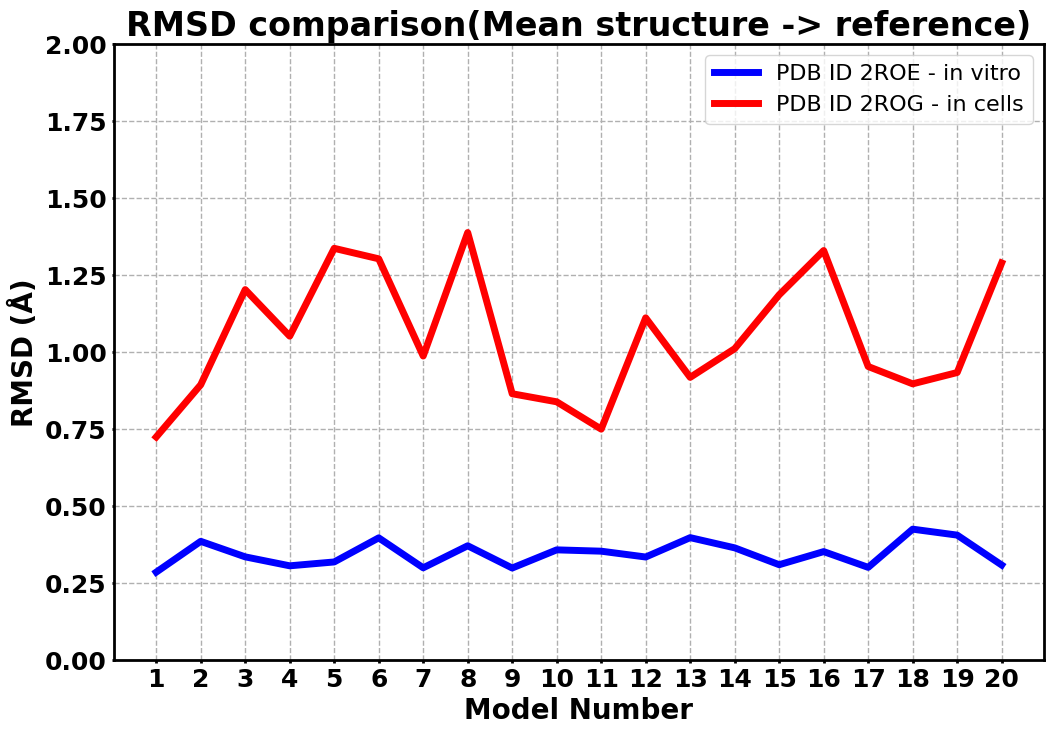

RMSD comparison plot saved as 2ROE_vs_2ROG_rmsd_comparison.png


In [ ]:
import urllib.request
import numpy as np
import csv
import matplotlib.pyplot as plt

def download_pdb(pdb_id):
    #Download PDB file from RCSB PDB
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    try:
        with urllib.request.urlopen(url) as response:
            pdb_data = response.read().decode('utf-8')
            return pdb_data
    except Exception as e:
        print(f"Error downloading PDB file: {e}")
        return None

def parse_coordinates(pdb_data):
    #Parse atomic coordinates from PDB file
    all_models = []
    ca_models = []
    current_model_all = []
    current_model_ca = []
    atom_info_all = []
    atom_info_ca = []
    ca_indices = []

    for line in pdb_data.split('\n'):
        if line.startswith('MODEL'):
            current_model_all = []
            current_model_ca = []
        elif line.startswith('ENDMDL'):
            all_models.append(current_model_all)
            ca_models.append(current_model_ca)
        elif line.startswith('ATOM'):
            atom_info = line[:30]
            x = float(line[30:38])
            y = float(line[38:46])
            z = float(line[46:54])
            current_model_all.append([x, y, z])
            atom_info_all.append(atom_info)
            if line[12:16].strip() == 'CA':  # Consider only Cα atoms for ca_models
                current_model_ca.append([x, y, z])
                atom_info_ca.append(atom_info)
                if len(all_models) == 0:  # Capture CA indices only for the first model
                    ca_indices.append(len(current_model_all) - 1)

    return np.array(all_models), np.array(ca_models), atom_info_all, atom_info_ca, ca_indices

def calculate_mean_structure(models):
    #Calculate mean structure from an ensemble of models
    mean_coords = np.mean(models, axis=0)
    return mean_coords

def calculate_rmsd(coords1, coords2):
    #Calculate RMSD between two structures
    diff = coords1 - coords2
    rmsd = np.sqrt(np.mean(np.sum(diff**2, axis=1)))
    return rmsd

def save_mean_structure(mean_structure, atom_info_all, pdb_id):
    #Save mean structure to a PDB file
    mean_pdb_file = f"{pdb_id}_mean.pdb"
    with open(mean_pdb_file, "w") as f:
        for i, (info, (x, y, z)) in enumerate(zip(atom_info_all, mean_structure)):
            f.write(f"{info}{x:8.3f}{y:8.3f}{z:8.3f}  1.00  0.00\n")
    print(f"Mean structure saved as {mean_pdb_file}")

def save_rmsd_to_csv(rmsd_values, pdb_id):
    #Save RMSD values to a CSV file
    rmsd_csv_file = f"{pdb_id}_rmsd-mean.csv"
    with open(rmsd_csv_file, "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Model", "RMSD"])
        for model_num, rmsd in enumerate(rmsd_values, start=1):
            writer.writerow([model_num, rmsd])
    print(f"RMSD values saved as {rmsd_csv_file}")

def plot_rmsd_comparison(rmsd_values1, pdb_id1, rmsd_values2, pdb_id2):
    #Plot RMSD values for comparison
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, len(rmsd_values1) + 1), rmsd_values1, linestyle='-', color='b', linewidth=5, markersize=8, label=f'PDB ID {pdb_id1} - in vitro')
    plt.plot(range(1, len(rmsd_values2) + 1), rmsd_values2, linestyle='-', color='r', linewidth=5, markersize=8, label=f'PDB ID {pdb_id2} - in cells')
    plt.title(f"RMSD comparison(Mean structure -> reference)", fontsize=24, fontweight='bold')
    plt.xticks(range(1, max(len(rmsd_values1), len(rmsd_values2)) + 1), fontsize=18,fontweight='bold')
    plt.yticks(fontsize=18, fontweight='bold')
    plt.xlabel("Model Number", fontsize=20,fontweight='bold')
    plt.ylabel("RMSD (Å)", fontsize=20,fontweight='bold')
    plt.ylim(0, 2.0)
    plt.grid(True, which='both', linestyle='--', linewidth=1.0)
    plt.gca().spines['top'].set_linewidth(2)
    plt.gca().spines['right'].set_linewidth(2)
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_linewidth(2)
    plt.gca().tick_params(width=2, length=1.8)
    plt.legend(fontsize=16)
    plt.savefig(f"{pdb_id1}_vs_{pdb_id2}_rmsd_comparison-mean.png", dpi=1500, bbox_inches='tight')
    plt.show()
    print(f"RMSD comparison plot saved as {pdb_id1}_vs_{pdb_id2}_rmsd_comparison.png")

def process_pdb(pdb_id):
    # Download PDB file
    pdb_data = download_pdb(pdb_id)
    if pdb_data:
        print(f"PDB file {pdb_id} downloaded successfully!")

        # Parse atomic coordinates
        all_models, ca_models, atom_info_all, atom_info_ca, ca_indices = parse_coordinates(pdb_data)

        if len(all_models) == 0:
            print(f"No models found in the PDB file {pdb_id}.")
            return

        # Calculate mean structure considering all atoms
        mean_structure = calculate_mean_structure(all_models)

        # Save mean structure to PDB file
        save_mean_structure(mean_structure, atom_info_all, pdb_id)

        # Extract mean structure Cα atoms using ca_indices
        mean_structure_ca = mean_structure[ca_indices]

        # Calculate RMSD for each model considering only Cα atoms
        rmsd_values = []
        for model_coords in ca_models:
            rmsd = calculate_rmsd(mean_structure_ca, model_coords)  # Consider only Cα atoms for RMSD
            rmsd_values.append(rmsd)

        # Save RMSD values to CSV file
        save_rmsd_to_csv(rmsd_values, pdb_id)

        return rmsd_values
    return []

def main(pdb_id1, pdb_id2):
    rmsd_values1 = process_pdb(pdb_id1)
    rmsd_values2 = process_pdb(pdb_id2)

    if rmsd_values1 and rmsd_values2:
        # Plot RMSD comparison
        plot_rmsd_comparison(rmsd_values1, pdb_id1, rmsd_values2, pdb_id2)

if __name__ == "__main__":
    pdb_id1 = "2ROE"  # Replace with the first PDB ID you want to analyze
    pdb_id2 = "2ROG"  # Replace with the second PDB ID you want to analyze
    main(pdb_id1, pdb_id2)


Using Mode structure as reference

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:588: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:588: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


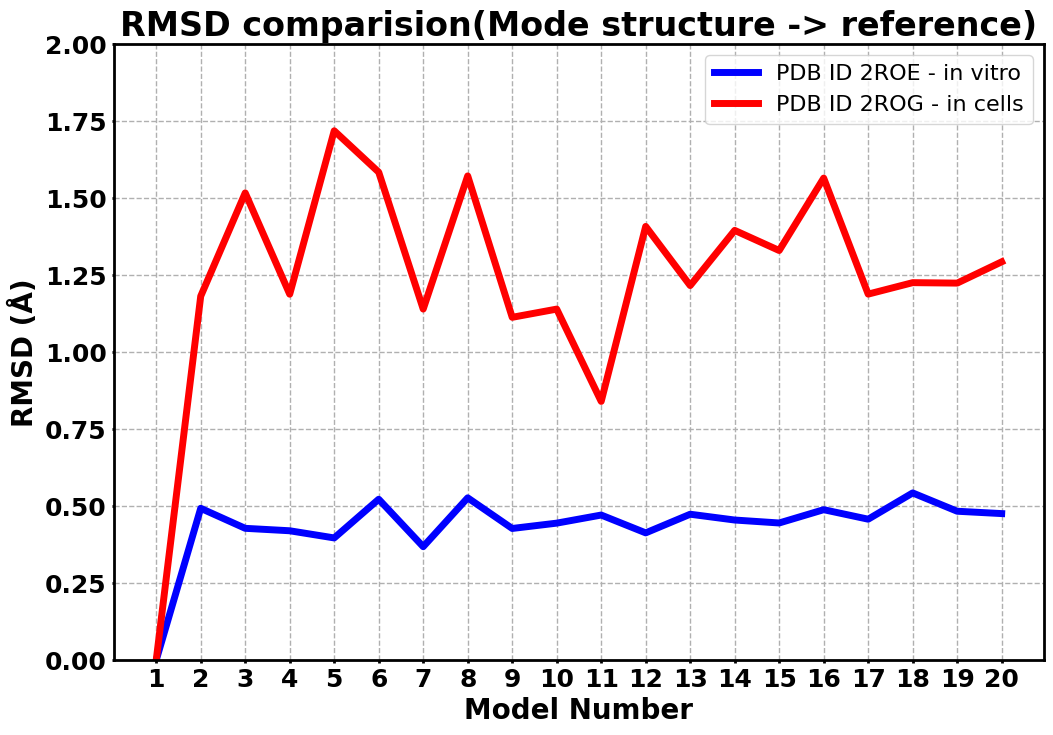

RMSD comparison plot saved as 2ROE_vs_2ROG_rmsd_comparison.png
Mode structure for 2ROE saved as 2ROE_mode.pdb
Mode structure for 2ROG saved as 2ROG_mode.pdb


In [ ]:
import numpy as np
import requests
from Bio.PDB import *
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

class NMR:
    def __init__(self, pdb_file):
        self.structure = self.load_structure(pdb_file)
        self.models = self.extract_models()
        self.num_models = len(self.models)
        self.ca_coords = self.get_ca_coords()
        self.mode_structure, self.labels = self.find_mode_structure()
        self.rmsd_to_mode = self.calculate_rmsd_to_mode()

    def load_structure(self, pdb_file):
        parser = PDBParser(QUIET=True)
        structure = parser.get_structure("NMR", pdb_file)
        return structure

    def extract_models(self):
        models = [model for model in self.structure.get_models()]
        return models

    def get_ca_coords(self):
        ca_coords = []
        for model in self.models:
            model_ca_coords = [atom.get_coord() for atom in model.get_atoms() if atom.get_name() == 'CA']
            ca_coords.append(model_ca_coords)
        return np.array(ca_coords)

    def find_mode_structure(self):
        # Calculate pairwise RMSD
        rmsd_matrix = np.zeros((self.num_models, self.num_models))
        for i in range(self.num_models):
            for j in range(i + 1, self.num_models):
                rmsd = self.calculate_rmsd(self.ca_coords[i], self.ca_coords[j])
                rmsd_matrix[i, j] = rmsd
                rmsd_matrix[j, i] = rmsd

        # Perform hierarchical clustering
        clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=5.0, linkage='average').fit(rmsd_matrix)

        # Identify the largest cluster
        labels = clustering.labels_
        unique_labels, counts = np.unique(labels, return_counts=True)
        largest_cluster_label = unique_labels[np.argmax(counts)]

        # Find all models in the largest cluster
        cluster_indices = np.where(labels == largest_cluster_label)[0]

        # Calculate the model with the minimum average RMSD to all other models in the cluster
        min_avg_rmsd = float('inf')
        mode_structure_index = cluster_indices[0]
        for i in cluster_indices:
            avg_rmsd = np.mean([self.calculate_rmsd(self.ca_coords[i], self.ca_coords[j]) for j in cluster_indices if i != j])
            if avg_rmsd < min_avg_rmsd:
                min_avg_rmsd = avg_rmsd
                mode_structure_index = i

        mode_structure = self.models[mode_structure_index]

        return mode_structure, labels

    def calculate_rmsd(self, coords1, coords2):
        # Calculate RMSD between two sets of coordinates
        diff = coords1 - coords2
        rmsd = np.sqrt(np.mean(np.sum(diff ** 2, axis=1)))
        return rmsd

    def calculate_rmsd_to_mode(self):
        # Calculate RMSD for each model's Cα atoms to the mode structure's Cα atoms
        mode_ca_coords = np.array([atom.get_coord() for atom in self.mode_structure.get_atoms() if atom.get_name() == 'CA'])

        rmsd_values = [self.calculate_rmsd(mode_ca_coords, model_ca_coords) for model_ca_coords in self.ca_coords]
        return rmsd_values

    def write_pdb(self, structure, filename):
        # Write structure to PDB file
        io = PDBIO()
        io.set_structure(structure)
        io.save(filename)

def download_pdb(pdb_id, filename):
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    response.raise_for_status()  # Ensure we got a valid response
    with open(filename, 'wb') as file:
        file.write(response.content)

def plot_rmsd(rmsd_values, pdb_id, color, label):
    #Plot RMSD values
    plt.plot(range(1, len(rmsd_values) + 1), rmsd_values, linestyle='-', color=color, linewidth=2, markersize=8, label=label)

def plot_rmsd_comparison(rmsd_values1, pdb_id1, rmsd_values2, pdb_id2):
    #Plot RMSD values for comparison
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, len(rmsd_values1) + 1), rmsd_values1, linestyle='-', color='b', linewidth=5, markersize=8, label=f'PDB ID {pdb_id1} - in vitro')
    plt.plot(range(1, len(rmsd_values2) + 1), rmsd_values2, linestyle='-', color='r', linewidth=5, markersize=8, label=f'PDB ID {pdb_id2} - in cells')
    plt.title(f"RMSD comparision(Mode structure -> reference)", fontsize=24, fontweight='bold')
    plt.xticks(range(1, max(len(rmsd_values1), len(rmsd_values2)) + 1), fontsize=18,fontweight='bold')
    plt.yticks(fontsize=18, fontweight='bold')
    plt.xlabel("Model Number", fontsize=20,fontweight='bold')
    plt.ylabel("RMSD (Å)", fontsize=20,fontweight='bold')
    plt.ylim(0, 2.0)
    plt.grid(True, which='both', linestyle='--', linewidth=1.0)
    plt.gca().spines['top'].set_linewidth(2)
    plt.gca().spines['right'].set_linewidth(2)
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_linewidth(2)
    plt.gca().tick_params(width=2, length=1.8)
    plt.legend(fontsize=16)
    plt.savefig(f"{pdb_id1}_vs_{pdb_id2}_rmsd_comparison-mode.png", dpi=1500, bbox_inches='tight')
    plt.show()
    print(f"RMSD comparison plot saved as {pdb_id1}_vs_{pdb_id2}_rmsd_comparison.png")

if __name__ == '__main__':
    pdb_id1 = "2ROE"  # Replace with your first PDB ID
    pdb_file1 = f"{pdb_id1}.pdb"
    pdb_id2 = "2ROG"  # Replace with your second PDB ID
    pdb_file2 = f"{pdb_id2}.pdb"

    # Download PDB files
    download_pdb(pdb_id1, pdb_file1)
    download_pdb(pdb_id2, pdb_file2)

    # Initialize NMR classes
    nmr1 = NMR(pdb_file1)
    nmr2 = NMR(pdb_file2)

    # Calculate RMSD to mode structure (mode Cα atoms only)
    rmsd_to_mode1 = nmr1.calculate_rmsd_to_mode()
    rmsd_to_mode2 = nmr2.calculate_rmsd_to_mode()

    # Plot RMSD comparison
    plot_rmsd_comparison(rmsd_to_mode1, pdb_id1, rmsd_to_mode2, pdb_id2)

    # Save mode structures to PDB files
    output_pdb_file1 = f"{pdb_id1}_mode.pdb"
    nmr1.write_pdb(nmr1.mode_structure, output_pdb_file1)
    print(f"Mode structure for {pdb_id1} saved as {output_pdb_file1}")

    output_pdb_file2 = f"{pdb_id2}_mode.pdb"
    nmr2.write_pdb(nmr2.mode_structure, output_pdb_file2)
    print(f"Mode structure for {pdb_id2} saved as {output_pdb_file2}")


### **PART B** - **Comparision of RMSF values in cellular v/s invitro condition**

Using Mean structure as reference

Processing 2ROE (in-vitro condition)...
Processing 2ROG (in-cell condition)...


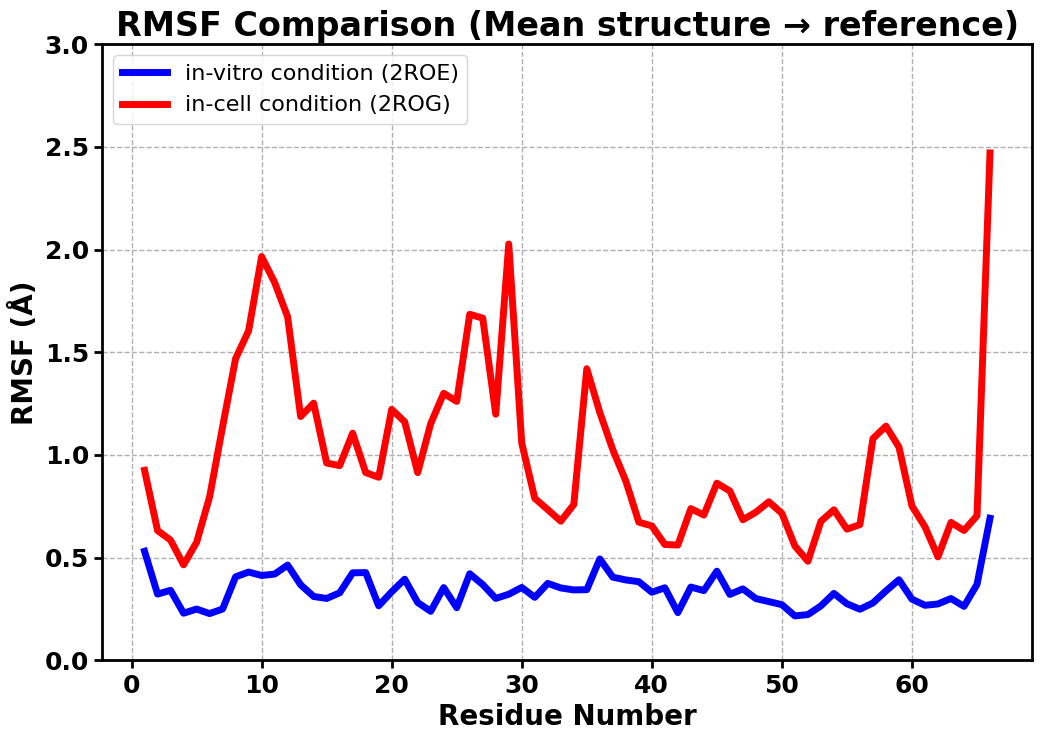

RMSF comparison plot saved as 2ROE_rmsf_comparison.png


In [ ]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def download_pdb(pdb_id):
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    try:
        with urllib.request.urlopen(url) as response:
            pdb_data = response.read().decode('utf-8')
            return pdb_data
    except Exception as e:
        print(f"Error downloading PDB file: {e}")
        return None

def parse_coordinates(pdb_data):
    models = []
    residue_numbers = []
    current_model = []
    current_residues = []

    for line in pdb_data.split('\n'):
        if line.startswith('MODEL'):
            current_model = []
            current_residues = []
        elif line.startswith('ENDMDL'):
            models.append(current_model)
            residue_numbers.append(current_residues)
        elif line.startswith('ATOM') and line[12:16].strip() == 'CA':
            x = float(line[30:38])
            y = float(line[38:46])
            z = float(line[46:54])
            res_num = int(line[22:26].strip())
            current_model.append([x, y, z])
            current_residues.append(res_num)

    return np.array(models), residue_numbers[0]

def calculate_mean_structure(models):
    return np.mean(models, axis=0)

def calculate_rmsf(models, mean_structure):
    diff = models - mean_structure[np.newaxis, :, :]
    return np.sqrt(np.mean(np.sum(diff**2, axis=2), axis=0))

def plot_comparison_rmsf(rmsf_dict, residue_numbers, pdb_id, condition_to_pdbid):
    plt.figure(figsize=(12, 8))

    # Plot RMSF for both conditions
    color_map = {
        "in-vitro condition": "blue",
        "in-cell condition": "red"
    }

    line_elements = []
    for condition, rmsf_values in rmsf_dict.items():
        pdb_label = f"{condition} ({condition_to_pdbid.get(condition)})"
        color = color_map.get(condition, 'gray')
        plt.plot(
            residue_numbers,
            rmsf_values,
            label=pdb_label,
            linewidth=5,
            color=color
        )
        line_elements.append(Line2D([0], [0], color=color, lw=5, label=pdb_label))

    # Legend
    plt.legend(handles=line_elements, loc='upper left', fontsize=16)

    # Title and axis labels
    plt.title(f"RMSF Comparison (Mean structure → reference)",fontsize=24,fontweight='bold')
    plt.xlabel("Residue Number", fontsize=20, fontweight='bold')
    plt.ylabel("RMSF (Å)", fontsize=20, fontweight='bold')

    # Ticks
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18, fontweight='bold')

    # Axis styling
    ax = plt.gca()
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.tick_params(width=2, length=6)

    # Grid and limits
    plt.grid(True, linestyle='--', linewidth=1.0)
    plt.ylim(0, 3)

    # Save high-resolution image
    plt.savefig(f"rmsf_comparison-mean.png", dpi=1500, bbox_inches='tight')
    plt.show()
    print(f"RMSF comparison plot saved as {pdb_id}_rmsf_comparison.png")


def main(pdb_ids):
    rmsf_dict = {}
    residue_numbers_ref = None
    reference_pdb_id = None
    condition_to_pdbid = {}

    for pdb_id, condition in pdb_ids:
        print(f"Processing {pdb_id} ({condition})...")
        pdb_data = download_pdb(pdb_id)
        if not pdb_data:
            continue

        models, residue_numbers = parse_coordinates(pdb_data)
        if len(models) == 0:
            print(f"No models found for {pdb_id}")
            continue

        mean_structure = calculate_mean_structure(models)
        rmsf_values = calculate_rmsf(models, mean_structure)

        if residue_numbers_ref is None:
            residue_numbers_ref = residue_numbers
            reference_pdb_id = pdb_id

        rmsf_dict[condition] = rmsf_values
        condition_to_pdbid[condition] = pdb_id

    if len(rmsf_dict) >= 2:
        plot_comparison_rmsf(rmsf_dict, residue_numbers_ref, reference_pdb_id, condition_to_pdbid)
    else:
        print("Not enough data for comparison.")

if __name__ == "__main__":
    pdb_ids = [("2ROE", "in-vitro condition"), ("2ROG", "in-cell condition")]
    main(pdb_ids)


Using Mode Structure as reference

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:588: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


RMSF values saved to 2ROE_rmsf_mode.csv


/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:588: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


RMSF values saved to 2ROG_rmsf_mode.csv


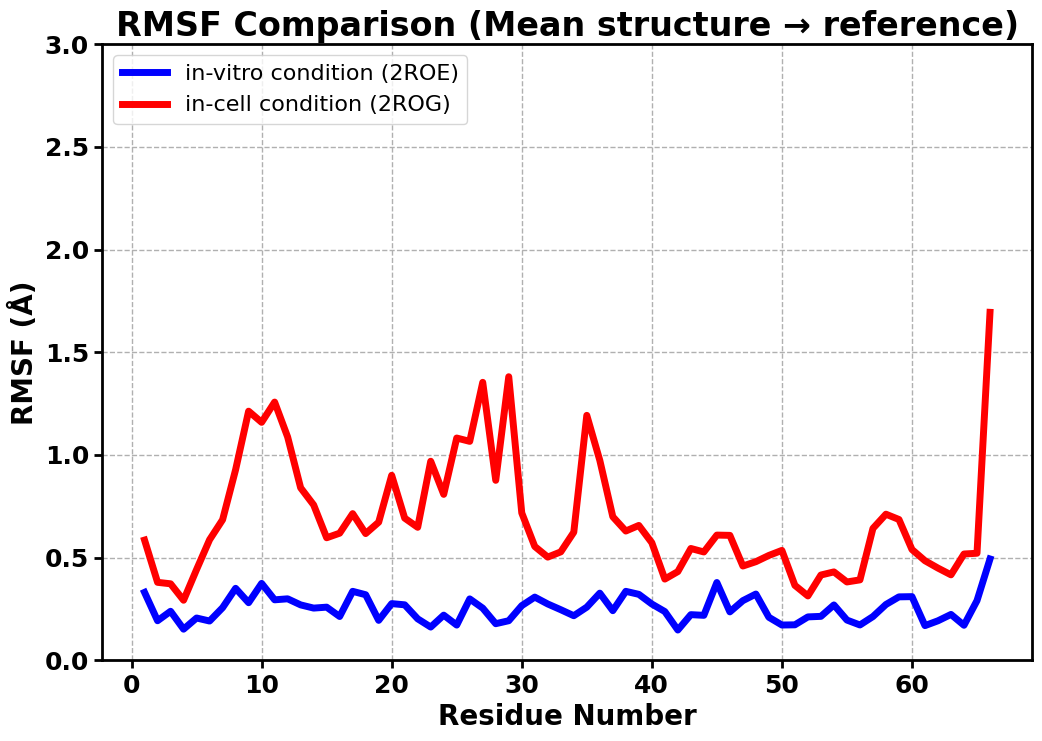

RMSF comparison plot saved as 2ROE_vs_2ROG_rmsf_comparison.png


In [ ]:
import numpy as np
import requests
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from Bio.PDB import *
from sklearn.cluster import AgglomerativeClustering
import csv

class NMR:
    def __init__(self, pdb_file):
        self.structure = self.load_structure(pdb_file)
        self.models = self.extract_models()
        self.num_models = len(self.models)
        self.ca_coords, self.residue_numbers, self.secondary_structure = self.parse_coordinates_and_secondary_structure(pdb_file)
        self.mode_structure, self.labels = self.find_mode_structure()

    def load_structure(self, pdb_file):
        parser = PDBParser(QUIET=True)
        return parser.get_structure("NMR", pdb_file)

    def extract_models(self):
        return [model for model in self.structure.get_models()]

    def parse_coordinates_and_secondary_structure(self, pdb_file):
        models, residue_numbers, secondary_structure = [], [], []
        current_model, current_residues = [], []

        with open(pdb_file, 'r') as file:
            for line in file:
                record_type = line[:6].strip()
                if record_type == 'MODEL':
                    current_model, current_residues = [], []
                elif record_type == 'ENDMDL':
                    models.append(current_model)
                    residue_numbers.append(current_residues)
                elif record_type == 'ATOM' and line[12:16].strip() == 'CA':
                    x, y, z = map(float, (line[30:38], line[38:46], line[46:54]))
                    res_num = int(line[22:26].strip())
                    current_model.append([x, y, z])
                    current_residues.append(res_num)
                elif record_type in ('HELIX', 'SHEET'):
                    sec_struct_type = line[:6].strip()
                    start_res = line[21:26].strip()
                    end_res = line[33:37].strip()
                    try:
                        start_res = int(start_res)
                        end_res = int(end_res)
                    except ValueError:
                        start_res = ''.join(filter(str.isdigit, start_res))
                        end_res = ''.join(filter(str.isdigit, end_res))
                        if start_res and end_res:
                            start_res = int(start_res)
                            end_res = int(end_res)
                    secondary_structure.append((sec_struct_type, start_res, end_res))

        return np.array(models), residue_numbers[0], secondary_structure

    def find_mode_structure(self):
        rmsd_matrix = np.zeros((self.num_models, self.num_models))
        for i in range(self.num_models):
            for j in range(i + 1, self.num_models):
                rmsd = self.calculate_rmsd(self.ca_coords[i], self.ca_coords[j])
                rmsd_matrix[i, j] = rmsd
                rmsd_matrix[j, i] = rmsd

        clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=5.0, linkage='average').fit(rmsd_matrix)
        labels = clustering.labels_
        unique_labels, counts = np.unique(labels, return_counts=True)
        largest_cluster_label = unique_labels[np.argmax(counts)]
        cluster_indices = np.where(labels == largest_cluster_label)[0]

        min_avg_rmsd = float('inf')
        mode_structure_index = cluster_indices[0]
        for i in cluster_indices:
            avg_rmsd = np.mean([self.calculate_rmsd(self.ca_coords[i], self.ca_coords[j]) for j in cluster_indices if i != j])
            if avg_rmsd < min_avg_rmsd:
                min_avg_rmsd = avg_rmsd
                mode_structure_index = i

        return self.models[mode_structure_index], labels

    def calculate_rmsd(self, coords1, coords2):
        return np.sqrt(np.mean(np.sum((coords1 - coords2) ** 2, axis=1)))

    def calculate_rmsf(self):
        mode_ca_coords = np.array([atom.get_coord() for atom in self.mode_structure.get_atoms() if atom.get_name() == 'CA'])
        rmsf_values = np.sqrt(np.mean((self.ca_coords - mode_ca_coords) ** 2, axis=(0, 2)))
        return rmsf_values, np.array(self.residue_numbers), self.secondary_structure

    def save_rmsf_to_csv(self, rmsf_values, residue_numbers, pdb_id):
        filename = f"{pdb_id}_rmsf_mode.csv"
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(['Residue Number', 'RMSF'])
            for res_num, rmsf in zip(residue_numbers, rmsf_values):
                csvwriter.writerow([res_num, rmsf])
        print(f"RMSF values saved to {filename}")

def download_pdb(pdb_id, filename):
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    response.raise_for_status()
    with open(filename, 'wb') as file:
        file.write(response.content)

def plot_comparison_rmsf(rmsf_dict, residue_numbers, pdb_id, condition_to_pdbid):
    plt.figure(figsize=(12, 8))

    # Plot RMSF for both conditions
    color_map = {
        "in-vitro condition": "blue",
        "in-cell condition": "red"
    }

    line_elements = []
    for condition, rmsf_values in rmsf_dict.items():
        pdb_label = f"{condition} ({condition_to_pdbid.get(condition)})"
        color = color_map.get(condition, 'gray')
        plt.plot(
            residue_numbers,
            rmsf_values,
            label=pdb_label,
            linewidth=5,
            color=color
        )
        line_elements.append(Line2D([0], [0], color=color, lw=5, label=pdb_label))

    # Legend
    plt.legend(handles=line_elements, loc='upper left', fontsize=16)

    # Title and axis labels
    plt.title( f"RMSF Comparison (Mean structure → reference)",fontsize=24, fontweight='bold')
    plt.xlabel("Residue Number", fontsize=20, fontweight='bold')
    plt.ylabel("RMSF (Å)", fontsize=20, fontweight='bold')

    # Ticks
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18, fontweight='bold')

    # Axis styling
    ax = plt.gca()
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.tick_params(width=2, length=6)

    # Grid and limits
    plt.grid(True, linestyle='--', linewidth=1.0)
    plt.ylim(0, 3)

    # Save high-resolution image
    plt.savefig(f"rmsf_comparison-mode.png", dpi=1500, bbox_inches='tight')
    plt.show()
    print(f"RMSF comparison plot saved as {pdb_id}_rmsf_comparison.png")


if __name__ == '__main__':
    condition_to_pdbid = {
        "in-vitro condition": "2ROE",
        "in-cell condition": "2ROG"
    }

    rmsf_dict = {}
    residue_numbers = None
    for condition, pdb_id in condition_to_pdbid.items():
        pdb_file = f"{pdb_id}.pdb"
        download_pdb(pdb_id, pdb_file)

        nmr = NMR(pdb_file)
        rmsf_values, res_nums, _ = nmr.calculate_rmsf()
        rmsf_dict[condition] = rmsf_values
        residue_numbers = res_nums

        nmr.save_rmsf_to_csv(rmsf_values, res_nums, pdb_id)

    plot_comparison_rmsf(rmsf_dict, residue_numbers, "2ROE_vs_2ROG", condition_to_pdbid)


## 3.4: Investigating dynamics of Immunoglobulin G-binding protein G in cellular environment

### 3.4.1: Quantifying alpha-helix telt in the cellular environment

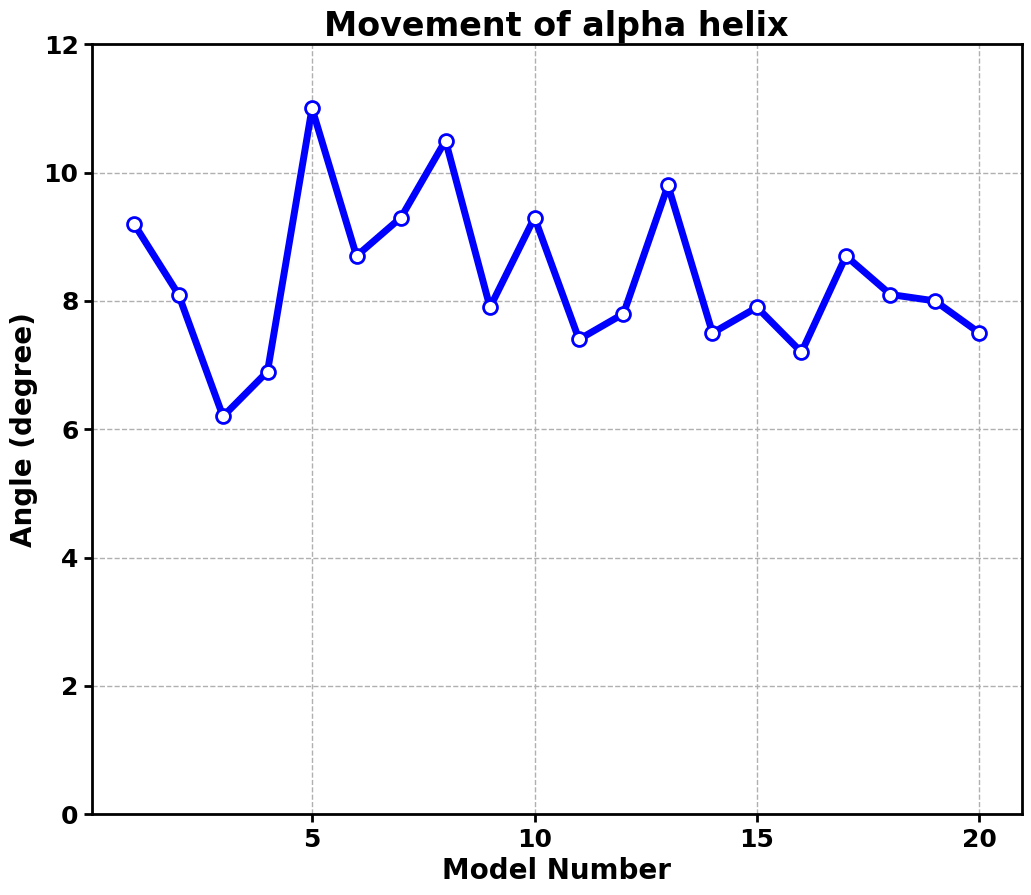

In [ ]:
import matplotlib.pyplot as plt

# Angle values
angles = [
    9.2, 8.1, 6.2, 6.9, 11.0, 8.7, 9.3, 10.5, 7.9, 9.3,
    7.4, 7.8, 9.8, 7.5, 7.9, 7.2, 8.7, 8.1, 8.0, 7.5
]
models = list(range(1, 21))

# Create plot
plt.figure(figsize=(12, 10))
plt.plot(models, angles, linestyle='-', color='blue', linewidth=5,
         marker='o', markersize=10, markerfacecolor='white', markeredgewidth=2)

# Title and axis labels
plt.title("Movement of alpha helix", fontsize=24, fontweight='bold')
plt.xlabel("Model Number", fontsize=20, fontweight='bold')
plt.ylabel("Angle (degree)", fontsize=20, fontweight='bold')

# Major ticks only at specific positions
major_xticks = [5, 10, 15, 20]
plt.xticks(major_xticks, fontsize=18, fontweight='bold')
plt.yticks(range(0, 13, 2), fontsize=18, fontweight='bold')

# Axes style
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2, length=6)

# Apply grid only on major ticks
ax.set_xticks(major_xticks)
ax.set_yticks(range(0, 13, 2))
ax.grid(True, linestyle='--', linewidth=1)

# Save figure
plt.savefig("alpha_helix_movement.png", dpi=1500, bbox_inches='tight')
plt.show()